## **Initlization of data**

In [ ]:
############### Importing libs ###############

import pandas as pd # Importing pandas framework to use dataframes.
import matplotlib.pyplot as plt # importing the matplot lib to make charts easier.
import seaborn as sb # Importing seaborn to use heatmaps
from google.colab import files # Importing files so I can upload the CSV file to google colab.
from sklearn.preprocessing import StandardScaler # Importing the standardscaler so i can scale my data.
from sklearn.tree import DecisionTreeClassifier # Importing DecisionTreeClassifier for building the decision tree model.
from sklearn.model_selection import train_test_split # Importing train_test_split for splitting the dataset into training and testing sets.
from sklearn.metrics import confusion_matrix, classification_report # Importing confusion_matrix and classification_report to evaluate the model's performance.
from sklearn import metrics # Importing metrics for various classification metrics (e.g., accuracy).
from sklearn import preprocessing # Importing preprocessing for data preprocessing tasks.

In [ ]:
uploaded = files.upload() # getting the CSV file to extract the data we need.

Saving hotel_bookings.csv to hotel_bookings.csv


In [ ]:
hotel_data_df = pd.read_csv('./hotel_bookings.csv') # Loading the CSV file into a dataframe and storing it at (fulldata_df)

## **Data Pre-processing**

In [ ]:
############### Checking for missing values ###############
hotel_data_df.isna().sum() # This code shows me all the columns that data is missing from.

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
############### Removing & fixing missing values ###############
hotel_data_df.dropna(subset=['children'], inplace=True) # Drop rows with missing values in the children column
# The reason why I have dropped the rows instead of changing their value's is because there is only 4 missing coloums so it does not effect the end result.

mode_country = hotel_data_df['country'].mode().iloc[0] # Calculate the mode (most frequent country) of the country column.
hotel_data_df['country'].fillna(mode_country, inplace=True) # Fill missing values in the country column with the mode country.
# The reason why I have used the mode function instead of just dropping the values is because there were 400+ missing entires if we were to delete these entries we would loose alot of data. I used mode because it gets the most common value instead of mean which gets the middle value.

hotel_data_df.drop('company', inplace=True, axis=1) # removes the comapny coloumn as it is not needed & because there are too many missing values.
hotel_data_df.drop('agent', inplace=True, axis=1) # removes the agent coloumn as it is not needed & becuase there are too many missing values.

In [ ]:
############### Removing rows that are not needed ###############
hotel_data_df.drop('distribution_channel', inplace=True, axis=1) # removes the distribution_channel coloumn as it is not needed.
hotel_data_df.drop('reservation_status_date', inplace=True, axis=1) # removes the reservation_status_date coloumn as it is not needed.
hotel_data_df.drop('required_car_parking_spaces', inplace=True, axis=1) # removes required_car_parking_spaces column as it is not needed.
hotel_data_df.drop('reservation_status', inplace=True, axis=1) # removes reservation_status column as it is not needed.

In [ ]:
############### Removes inconsistent values ###############
# Removing all the rows that have 0 adults, children and babies because these are inconsistent values, this data is not usefull to us.
zero_people = hotel_data_df[(hotel_data_df['adults'] == 0) & (hotel_data_df['children'] == 0) & (hotel_data_df['babies'] == 0)] # Gets rows with 0 adults, children & babies.
hotel_data_df.drop(zero_people.index) # removes the rows by getting the indexes.

# Remvoing all the rows that have no stays because these are inconsistent values, this data is not usefull as its incomplete.
zero_stays = hotel_data_df[(hotel_data_df['stays_in_weekend_nights'] ==  0) & (hotel_data_df['stays_in_week_nights'] == 0)] # Gets rows with stays_in_weekend_nights & stays_in_week_nights.
hotel_data_df.drop(zero_stays.index) # removes the rows by getting the indexes.

# Removing all the rows that have Undefined meal types.
zero_meal = hotel_data_df[(hotel_data_df['meal'] == 'Undefined')] # Gets all rows that have meal as Undefined.
hotel_data_df.drop(zero_meal.index) # removes the rows by getting the indexes.

In [ ]:
############### Checking for columns that should be different datatypes ###############
hotel_data_df.dtypes # dtypes function gets columns data type.

In [ ]:
############### Changing column data types ###############
hotel_data_df['children'] = hotel_data_df['children'].astype('int64') # Chaging the children data type to an int64 instead of a float64 because the childs age should only be represented as a whole number.

## **Exploratory Data Analysis (EDA)**

In [ ]:
############### Boxplot ###############
adr = hotel_data_df['adr'] # Storing data within the adr varible.
sb.boxplot(adr) # Plotting the adr vaules.
plt.title('Boxplot of average daily rate') # # Creating the title for the boxplot.
plt.show() # Displaying the boxplot.

In [ ]:
############### Boxplot graph ###############
weekend_nights = hotel_data_df['stays_in_weekend_nights'] # Creating the varible weekend_nights to represent stays_in_weekend_nights.
plt.figure(figsize=(5,5)) # Setting the size of the graph.
plt.boxplot(weekend_nights) # Plotting the boxplot.
plt.title('Box Plot for Stays in Weekend Nights') # Creating the title for the chart.
plt.xlabel('Weekend nights') # Creating the X axis label name.
plt.ylabel('Number of Nights') # Creating the Y axis label name.
plt.show() # Showing the boxplot

# The box plot will show all the outliers. The outliers are outside of the 'wiskers' which are the two horizontal lights outside the box.

In [ ]:
############### Boxplot graph ###############
week_nights = hotel_data_df['stays_in_week_nights'] # creating the varible weekend_nights to represent stays_in_weekend_nights
plt.figure(figsize=(5,5)) # Setting the size of the graph.
plt.boxplot(week_nights) # Plotting the boxplot.
plt.title('Box Plot for Stays in Week Nights') # Creating the title for the chart.
plt.xlabel('Week nights') # Creating the X axis label name.
plt.ylabel('Number of Nights') # Creating the Y axis label name.
plt.show() # Showing the boxplot

# The box plot will show all the outliers. The outliers are outside of the 'wiskers' which are the two horizontal lights outside the box.

In [ ]:
############### Bar graph ###############
most_common_customer_type = hotel_data_df['customer_type'].value_counts().sort_index() # Creating a varible to count the occurrences of each customer type and sort the index.
plt.figure(figsize=(5,5)) # Setting the size of the graph.
most_common_customer_type.plot(kind='bar') # Plotting the count for each customer type category.
plt.title('Most Common Customer Type') # Creating the title for the graph.
plt.xlabel('Customer Type') # Creating the X axis label name.
plt.ylabel('Amount of guests') # Creating the Y axis label name.
plt.show() # Display the graph.

In [ ]:
############### Bar graph ###############
most_common_room_type = hotel_data_df['assigned_room_type'].value_counts().sort_index() # Creating a varible to count the occurrences of each assigned room type and sort the index.
plt.figure(figsize=(5,5)) # Setting the size of the graph.
most_common_room_type.plot(kind='bar') # Plotting the count for each room type category.
plt.title('Most Common Room Type') # Creating the title for the graph.
plt.xlabel('Room Type') # Creating the X axis label name.
plt.ylabel('Number of Guests') # Creating the Y axis label name.
plt.show() # Display the graph.

In [ ]:
############### Bar graph ###############
Total_Stay_bar_graph = (hotel_data_df['stays_in_weekend_nights'] + hotel_data_df['stays_in_week_nights']).value_counts().sort_index() # Creating a varible to calculate the total stay combining the weekends and weekdays, count the occurrences, and sort the index.
plt.figure(figsize=(10,5)) # Setting the size of the graph.
Total_Stay_bar_graph.plot(kind='bar') # Plotting the count for total nights stayed.
plt.title('Guest Stay Duration Distribution') # Creating the title for the graph.
plt.xlabel('Total Stay Duration (Nights)') # Creating the X axis label name.
plt.ylabel('Number of Guests') # Creating the Y axis label name.
plt.show() # Display the graph.

In [ ]:
############### Line graph ###############
monthly_guests = hotel_data_df.groupby('arrival_date_month')[['adults', 'children', 'babies']].sum().sum(axis=1) # Group the counts of adults, children, and babies by arrival date month to calculate the total number of guests each month. Using the axis=1 parameter to merge each column into a single line.
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] # An array of months in order.
monthly_guests_line_graph = monthly_guests.reindex(month_order) # reindexing the monthly guests based on the month order array.
plt.figure(figsize=(15, 4))  # Setting the size of the graph.
plt.plot(monthly_guests_line_graph) # Plotting the monthly guests.
plt.title('Number of Guests Each Month') # Creating the title for the graph.
plt.xlabel('Month') # Creating the X axis label name.
plt.ylabel('Number of Guests') # Creating the Y axis label name.
plt.show() # Display the graph.

In [ ]:
############### Pie chart ###############
most_common_meal_type = hotel_data_df['meal'].value_counts().sort_index() # Creating a varible to count the occurrences of different meal types and sort them.
plt.figure(figsize=(5, 5)) # Setting the size of the chart.
most_common_meal_type.plot(kind='pie', autopct='%1.1f%%') # Plotting the meal types on pie chart and shows %.
plt.title('Most Frequemnt Meal Type') # Creating the title for the chart.
plt.show() # Display the chart.

In [ ]:
############### Pie chart ###############
guest_counts = hotel_data_df["hotel"].value_counts().sort_index() # Creating a varible to count the number of guests in each hotel category.
plt.figure(figsize=(5, 5)) # Setting the size of the chart.
guest_counts.plot(kind='pie', autopct='%1.1f%%') # Plotting guests count difference between city hotel and resort hotel and shows &.
plt.title("Guests in each hotel") # Creating the title for the chart.
plt.show() # Display the chart.

In [ ]:
############### Pie chart ###############
returning_guest_counts = hotel_data_df["is_repeated_guest"].value_counts().sort_index() # Creating a varible to count the number of returning guests in the DataFrame and sort the values.
plt.figure(figsize=(5, 5)) # Setting the size of the chart.
returning_guest_counts.plot(kind='pie', autopct='%1.1f%%') # Plotting the number of returining guests and non returining guests and showing the %.
plt.title('Number of Returning Guests') # Creating the title for the chart.
plt.xlabel('0=Not reapeated  1=reapted') # Creating the X axis label name.
plt.show() # Display the chart.

In [ ]:
############### Pie chart ###############
# Dictionary mapping country codes to continents
country_code_to_continent = {'PRT': 'Europe','GBR': 'Europe','USA': 'North America','ESP': 'Europe','IRL': 'Europe',
                             'FRA': 'Europe','ROU': 'Europe','NOR': 'Europe','OMN': 'Asia','ARG': 'South America',
                             'POL': 'Europe','DEU': 'Europe','BEL': 'Europe','CHE': 'Europe','CN': 'Asia',
                             'GRC': 'Europe','ITA': 'Europe','NLD': 'Europe','DNK': 'Europe','RUS': 'Europe',
                             'SWE': 'Europe','AUS': 'Oceania','EST': 'Europe','CZE': 'Europe','BRA': 'South America',
                             'FIN': 'Europe','MOZ': 'Africa','BWA': 'Africa','LUX': 'Europe','SVN': 'Europe',
                             'ALB': 'Europe','IND': 'Asia','CHN': 'Asia','MEX': 'North America','MAR': 'Africa',
                             'UKR': 'Europe','SMR': 'Europe','LVA': 'Europe','PRI': 'North America','SRB': 'Europe',
                             'CHL': 'South America','AUT': 'Europe','BLR': 'Europe','LTU': 'Europe','TUR': 'Asia',
                             'ZAF': 'Africa','AGO': 'Africa','ISR': 'Asia','CYM': 'North America','ZMB': 'Africa',
                             'CPV': 'Africa','ZWE': 'Africa','DZA': 'Africa','KOR': 'Asia','CRI': 'North America',
                             'HUN': 'Europe','ARE': 'Asia','TUN': 'Africa','JAM': 'North America','HRV': 'Europe',
                             'HKG': 'Asia','IRN': 'Asia','GEO': 'Asia','AND': 'Europe','GIB': 'Europe',
                             'URY': 'South America','JEY': 'Europe','CAF': 'Africa','CYP': 'Europe','COL': 'South America',
                             'GGY': 'Europe','KWT': 'Asia','NGA': 'Africa','MDV': 'Asia','VEN': 'South America',
                             'SVK': 'Europe','FJI': 'Oceania','KAZ': 'Asia','PAK': 'Asia','IDN': 'Asia',
                             'LBN': 'Asia','PHL': 'Asia','SEN': 'Africa','SYC': 'Africa','AZE': 'Asia',
                             'BHR': 'Asia','NZL': 'Oceania','THA': 'Asia','DOM': 'North America','MKD': 'Europe',
                             'MYS': 'Asia','ARM': 'Asia','JPN': 'Asia','LKA': 'Asia','CUB': 'North America',
                             'CMR': 'Africa','BIH': 'Europe','MUS': 'Africa','COM': 'Africa','SUR': 'South America',
                             'UGA': 'Africa','BGR': 'Europe','CIV': 'Africa','JOR': 'Asia','SYR': 'Asia',
                             'SGP': 'Asia','BDI': 'Africa','SAU': 'Asia','VNM': 'Asia','PLW': 'Oceania',
                             'QAT': 'Asia','EGY': 'Africa','PER': 'South America','MLT': 'Europe','MWI': 'Africa',
                             'ECU': 'South America','MDG': 'Africa','ISL': 'Europe','UZB': 'Asia','NPL': 'Asia',
                             'BHS': 'North America','MAC': 'Asia','TGO': 'Africa','TWN': 'Asia','DJI': 'Africa',
                             'STP': 'Africa','KNA': 'North America','ETH': 'Africa','IRQ': 'Asia','HND': 'North America',
                             'RWA': 'Africa','KHM': 'Asia'
                             }
continent_guests = hotel_data_df['country'].map(country_code_to_continent).value_counts().sort_index() # Creating a varible to map the country codes to continents and counting the number of guests per continent.
plt.figure(figsize=(10,10)) # Setting the size of the chart.
continent_guests.plot(kind='pie', autopct='%1.1f%%') # Plotting each continent were guests are from with %.
plt.title("Guests' Geographical Origins by Continent") # Creating the title for the chart.
plt.show() # Display the chart.


In [ ]:
############### Heatmap ###############
correlation = hotel_data_df[['assigned_room_type', 'is_canceled']].corr() # Creating a varible to calculate the correlation between 'assigned_room_type' and 'is_canceled'.
sb.heatmap(correlation, annot=True) # Plotting the correlations between assigned_room_type and is_canncled.
plt.title('Correlation Between Room Types and Cancellations') # Creating the title for the heatmap.
plt.show() # Display the heatmap.

## **Feature Engineering**

In [ ]:
############### Dropping rows after they have been used in the EDA ###############
hotel_data_df.drop('arrival_date_year', inplace=True, axis=1) # removes the arrival_date_year column as it is not needed anymore.
hotel_data_df.drop('arrival_date_week_number', inplace=True, axis=1) # removes the arrival_date_week_number column as it is not needed anymore.
hotel_data_df.drop('arrival_date_day_of_month', inplace=True, axis=1) # removes the arrival_date_day_of_month column as it is not needed anymore
hotel_data_df.drop('arrival_date_month', inplace=True, axis=1) # removes the arrival_date_month column as it is not needed anymore.
hotel_data_df.drop('customer_type', inplace=True, axis=1) # Removes the customer_type column as it is not needed anymore.
hotel_data_df.drop('hotel', inplace=True, axis=1) # Removes the hotel column as it is not needed anymore.

In [ ]:
############### Covariance ###############
hotel_data_df.cov() # Calculating the covarience between columns.

In [ ]:
############### Correlation ###############
hotel_data_df.corr() # Calculating the correlation between columns.

In [ ]:
############### Variance ###############
hotel_data_df.var(numeric_only=None) # Calculating the variance of all the numeric columns.

In [ ]:
############### Heatmap ###############
Covariance = hotel_data_df.cov() # Creating a varible to calculate the covariance of the entire DataFrame
sb.heatmap(Covariance) # Plotting the Covariance between the fulldata set.
plt.show() # Display the heatmap.

In [ ]:
############### Heatmap ###############
correlation = hotel_data_df.corr() # Creating a varible to calculate the correlation of the entire DataFrame
sb.heatmap(correlation) # Plotting the correlation between the fulldata set.
plt.show() # Display the heatmap.

In [ ]:
adr_outliers = hotel_data_df[hotel_data_df['adr'] > 2000].index
hotel_data_df.drop(adr_outliers, inplace=True)

In [ ]:
############### Binning ###############
bins = [0, 7, 30, 90, hotel_data_df['lead_time'].max()] # Bins are set as 0, 7, 30, 90 and the max lead time in the column.
labels = ['short lead time', 'medium lead time', 'long lead time', 'very long lead time'] # Setting the labels for each bin.
hotel_data_df['lead_time_bins'] = pd.cut(hotel_data_df['lead_time'], bins=bins, labels=labels, include_lowest=True) # Applying bin categories to 'lead_time' column and creating a new column 'lead_time_bins'.

total_individuals = hotel_data_df['adults'] + hotel_data_df['children'] + hotel_data_df['babies'] # Varible adding all the adults, children and babies staying per guest.
bins = [1, 3, 6, 8, total_individuals.max()] #  Bins are set as 1, 3, 6, 8 and the max total individuals in the column.
labels = ['small group', 'medium group', 'large group', 'very large group'] # Setting the labels for each bin.
hotel_data_df['group_size_bins'] = pd.cut(total_individuals, bins=bins, labels=labels, include_lowest=True) # Applying bin categories to 'total_individuals' column and creating 'group_size_bins' column.

total_nights = hotel_data_df['stays_in_weekend_nights'] + hotel_data_df['stays_in_week_nights'] # Varible adding the weekend nights and the week nights to the total nights stayed.
bins = [2, 5, 12, 15, total_nights.max()] # Bins are set as 2, 5, 12, 15 and the max total nights stayed in the column.
labels = ['short stay', 'medium stay', 'long stay', 'very long stay'] # Setting the labels for each bin.
hotel_data_df['total_nights_bins'] = pd.cut(total_nights, bins=bins, labels=labels, include_lowest=True) # Applying bin categories to 'total_nights' column and creating 'total_nights_bins' column.

bins = [0, 1, 2, hotel_data_df['previous_cancellations'].max()] # Bins are set as 0, 1, 2 and the max amount of previous cancellations a guest has done in the column.
labels = ['low frequency', 'medium frequency', 'high frequency'] # Setting the labels for each bin.
hotel_data_df['previous_cancellations_bins'] = pd.cut(hotel_data_df['previous_cancellations'], bins=bins, labels=labels, include_lowest=True) # Applying bin categories to 'previous_cancellations' column and creating a new column 'previous_cancellations_bins'.

In [ ]:
############### Encoding all Nominal Data ###############
hotel_data_df['meal'] = hotel_data_df['meal'].replace({'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}) # Chaning all the strings to numerical values (int64) so the Classifier can understand the data.
hotel_data_df['country'] = hotel_data_df['country'].astype('category') # changing country type to category so I can use cat codes to encode
hotel_data_df['country'] = hotel_data_df['country'].cat.codes # using cat codes here because there are too many different tpyes of countires
hotel_data_df['market_segment'] = hotel_data_df['market_segment'].replace({'Direct' : 0, 'Corporate' : 1, 'Online TA' : 2, 'Offline TA/TO' : 3, 'Complementary' : 4, 'Groups' : 5, 'Aviation' : 6}) # Chaning all the strings to numerical values (int64) so the Classifier can understand the data.
hotel_data_df['deposit_type'] = hotel_data_df['deposit_type'].replace({'No Deposit' : 0, 'Refundable' : 1, 'Non Refund' : 2}) # Chaning all the strings to numerical values (int64) so the Classifier can understand the data.

In [ ]:
############### Encoding all Ordianal Data ###############
# Presuming the lower the letter the "better" the room reserved_room_type is also ordinal
encode_onehot_reserved_room_type = pd.get_dummies(hotel_data_df['reserved_room_type'], prefix='reserved_room_type') # Encoding the reserved_room_type column using one-hot encoding creating dummy columns for each value.
hotel_data_df = hotel_data_df.drop('reserved_room_type', axis=1) # Removes the original reserved_room_type column as it is not needed anymore.
hotel_data_df = hotel_data_df.join(encode_onehot_reserved_room_type) # Joining the encode_onehot_reserved_room_type df to the hotel_data df.

# Presuming the lower the letter the "better" the room assigned_room_type is also ordinal
encode_onehot_assigned_room_type = pd.get_dummies(hotel_data_df['assigned_room_type'], prefix='assigned_room_type') # Encoding the assigned_room_type column using one-hot encoding creating dummy columns for each value.
hotel_data_df = hotel_data_df.drop('assigned_room_type', axis=1) # Removes the original assigned_room_type column as it is not needed anymore.
hotel_data_df = hotel_data_df.join(encode_onehot_assigned_room_type) # Joining the encode_onehot_assigned_room_type df to the hotel_data df.

# There is a hierarchy involved when binning columns from short lead time to very long lead time.
encode_onehot_lead_time_bins = pd.get_dummies(hotel_data_df['lead_time_bins'], prefix='lead_time_bins') #  Encoding the lead_time_bins column using one-hot encoding creating dummy columns for each value.
hotel_data_df = hotel_data_df.drop('lead_time_bins', axis=1) # Removes the original lead_time_bins column as it is not needed anymore/
hotel_data_df = hotel_data_df.join(encode_onehot_lead_time_bins) # Joining the encoded_one_hot_bins df to the hotel_data df.

# There is a hierarchy invloved when binning columns from a small group size to a large group size.
encode_onehot_group_size_bins = pd.get_dummies(hotel_data_df['group_size_bins'], prefix='group_size_bins') # Encoding the group_size_bins column using one-hot encoding creating dummy columns for each value.
hotel_data_df = hotel_data_df.drop('group_size_bins', axis=1) # Removes the original group_size_bins column as it is not needed anymore.
hotel_data_df = hotel_data_df.join(encode_onehot_group_size_bins) # Joining the encoded_onehot_group_size_bins df to the hotel_data df.

# There is a hirarchy involved when binning columns from a short stay to  very long stay.
encode_onehot_total_nights_bins = pd.get_dummies(hotel_data_df['total_nights_bins'], prefix='total_nights_bins') # Encoding the total_nights_bins columnn using one-hot encoding creating dummy columns for each value.
hotel_data_df = hotel_data_df.drop('total_nights_bins', axis=1) # Removes the original total_nights_bins column as it is not needed anymore.
hotel_data_df = hotel_data_df.join(encode_onehot_total_nights_bins) # Joining the encoded_one_hot_total_nights_bins df to the hotel_data df.

# There is a hierarchy involved when binning columns from a low frequency of a guest canceling to a very high frequency.
encode_onehot_previous_cancellations_bins = pd.get_dummies(hotel_data_df['previous_cancellations_bins'], prefix='previous_cancellations_bins') # Encoding the previous_cancellations_bins columnn using one-hot encoding creating dummy clumns for each value.
hotel_data_df = hotel_data_df.drop('previous_cancellations_bins', axis=1) # Removes the original previous_cancellations_bins column as it is not needed anymore.
hotel_data_df = hotel_data_df.join(encode_onehot_previous_cancellations_bins) # Joining the encoded_onehot_previous_cancellations_bins df to the hotel_data df.

In [ ]:
############### Standard scaling ###############
hotel_data_df_standard_scaled = hotel_data_df.copy() # Taking a copy of the hotel_data_df and storing it as hotel_data_df_standard_scaled.
std_scaler = StandardScaler() # Setting the standard scaler.
hotel_data_df_standard_scaled = pd.DataFrame(std_scaler.fit_transform(hotel_data_df_standard_scaled.values),columns=hotel_data_df_standard_scaled.columns, index=hotel_data_df_standard_scaled.index) # makeing the numerical columns standardized with a mean of 1 and a standard deviation of 1.

## **Classifier Training**

In [ ]:
############### Decision tree classifier ###############
x = hotel_data_df_standard_scaled.drop(columns="is_canceled") # Creating a dataframe 'x' with the column is_canceled removed. So I can train the model.
y = hotel_data_df_standard_scaled['is_canceled'] # Creating a dataframe 'y' with only the column is_canceled.

normalized_X = preprocessing.normalize(x) # Normalizing the data in the varible 'x'.
standardized_X = preprocessing.scale(x) # standardizing the data in the varible 'y'.

y = pd.get_dummies(y) # Converting 'y' into dummy varibles using one-hot encoding.



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1) # Split the dataset into training and testing sets.
dt = DecisionTreeClassifier() # Creating an instance of the decision tree classifier.

Result_DT = dt.fit(X_train,y_train) # Loading the training data into the classifier.
y_pred = dt.predict(X_test) # Predicting is_canceled using the decision tree classifier.

data_accuracy = metrics.accuracy_score(y_test, y_pred) # Determining the accuracy scores by comparing the predicted values against the actual values within the dataset.

dt = DecisionTreeClassifier(criterion = 'gini', random_state=1) # Creating a Decision Tree Classifier with Gini criterion and a set random state.
dt= dt.fit(X_train, y_train) # Loading the training data into the classifier.

y_pred = dt.predict(X_test) # Predicting is_canceled using the decision tree classifier.

data_accuracy = metrics.accuracy_score(y_test, y_pred) # Determining the accuracy scores by comparing the predicted values against the actual values within the dataset.



X_train, X_test, y_train, y_test = train_test_split(normalized_X, y,test_size=0.3, stratify=y, random_state=1) # Split the dataset into training and testing sets.

dt = DecisionTreeClassifier(criterion = 'gini', random_state=1) # Creating a Decision Tree Classifier with Gini criterion and a set random state.
dt= dt.fit(X_train, y_train) # Loading the training data into the classifier.

y_pred = dt.predict(X_test) # Predicting is_canceled using the decision tree classifier.

normalized_data_accuracy = metrics.accuracy_score(y_test, y_pred) # Determining the accuracy scores by comparing the predicted values against the actual values within the dataset.



X_train, X_test, y_train, y_test = train_test_split(standardized_X, y,test_size=0.3,stratify=y, random_state=1) # Split the dataset into training and testing sets.

dt = DecisionTreeClassifier(criterion = 'gini', random_state=1) # Creating a Decision Tree Classifier with Gini criterion and a set random state.
dt= dt.fit(X_train, y_train) # Loading the training data into the classifier.

y_pred = dt.predict(X_test) # Predicting is_canceled using the decision tree classifier.

standardized_data_accuracy = metrics.accuracy_score(y_test, y_pred) # Determining the accuracy scores by comparing the predicted values against the actual values within the dataset.

## **Feature Importance**

In [ ]:
############### Data accuracy ###############
print("Data Accuracy:",data_accuracy) # Prints the data accuracy.
print("Normalised data Accuracy:",normalized_data_accuracy) # Prints normalised data accuracy.
print("Standardised Accuracy:",standardized_data_accuracy) # Prints standardized data accuracy.

Data Accuracy: 0.8223978110341746
Normalised data Accuracy: 0.8122068349341076
Standardised Accuracy: 0.8223978110341746


**Classification Report**

The classification report tell us the capability of the model and how good it is at predicting hotel cancelations.

**Precision**

The precision score is the accuracy of correctly predicting positive outcomes out of all the positive instances expected. The model stands at 86% accuracy for bookings not canceled (class 0) and 76% for bookings canceled (class 1).

**Recall**

The recall score is the ratio of correctly predicited positives to all the actual positives in the data. The model stands at 85% accuracy for bookings not cancled (class 0) and 76% for bookings canceled (class 1).

**f1-score**

The f1 score is a combination of the precision score and the recall score giving you the overall score. The models stands at 86& accuracy for bookings not cancled (class 0) and 76% for bookings canceled (class 1).

**Support**

The support column shows how many instances belongs to each class within the dataset.

In [ ]:
############### Classifier Training Report ###############
print(metrics.classification_report(y_test, y_pred,digits=2,output_dict=False)) # Prints the classification report with precision, recall, and F1-score for each class.

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     22550
           1       0.76      0.77      0.76     13266

   micro avg       0.82      0.82      0.82     35816
   macro avg       0.81      0.81      0.81     35816
weighted avg       0.83      0.82      0.82     35816
 samples avg       0.82      0.82      0.82     35816



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Visulization of important features & discussion**

The features that are printed below are the top 15 most important features when training the decision tree model. Feature importances is important as it shows us the the most needed features to train a good model.

**Deposit Type (24%)**
  *   This feature stands out as the primary predictor for booking cancellations. It reveals that guests placing a non-refundable deposit are significantly less likely to cancel. This highlights a strong link, indicating that different types of deposit types are a substantial indicator of cancelation. Which makes sense as guests dont want to loose money.

**Lead Time (23%)**
  *   Lead time, reflecting the duration between booking and arrival, holds significant predictive power for cancellations. Guests who book far in advance are more organized and scheduled, leading to a decreased likelihood of cancellations. In contrast, shorter lead times often relate to unexpected circumstances, prompting higher cancellation rates.

**Country (11%)**
  *   Country stands as the third most important feature, given the nature of international travel. Guests traveling from abroad generally need to book flights, incurring higher costs and necessitating more extensive planning and financial management. On the other hand, guests from domestic locations may have relatively less stringent planning.

Overall, the top three feature importance scores demonstrate accuracy in predicting cancellations. A non-refundable deposit indicates commitment, a longer lead time signifies thorough planning, and the guest's country of origin implicates potential complexities due to flight arrangements and the need for comprehensive planning. These features could guide future actions in managing bookings by understanding customer behaviour we can minimize cancellations. If we drop any of these columns, it would substantially diminish the decision tree's accuracy and reliability in predicting cancellations correctly.













In [ ]:
############### Table ###############
print("       Top 15 most important features") # prints title for the table below.
top_15_features = pd.concat((pd.DataFrame(hotel_data_df_standard_scaled.iloc[:, 1:].columns, columns = ['variable']), pd.DataFrame(dt.feature_importances_, columns = ['importance'])), axis = 1).sort_values(by='importance', ascending =False)[:15] # Concatenating and sorting feature importances in descending order to display the top 15 important features.
print(top_15_features) # Printing the top 15 features.

       Top 15 most important features
                        variable  importance
13                  deposit_type    0.234627
0                      lead_time    0.164838
15                           adr    0.145719
7                        country    0.096096
8                 market_segment    0.082742
2           stays_in_week_nights    0.047436
16     total_of_special_requests    0.044165
1        stays_in_weekend_nights    0.026252
10        previous_cancellations    0.023905
12               booking_changes    0.019396
3                         adults    0.015433
6                           meal    0.015029
27          assigned_room_type_A    0.010320
17          reserved_room_type_A    0.008196
47  total_nights_bins_short stay    0.008045


The pie chart shows the top 15 most important features that the model used to predict cancellations and the usefullness of each by show there % points.

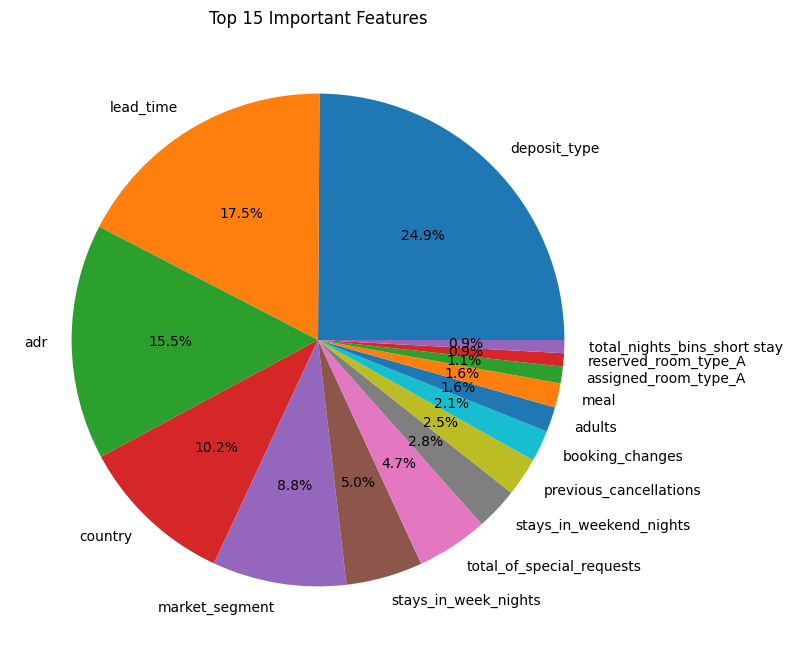

In [ ]:
############### Pie chart ###############
plt.figure(figsize=(8,8)) # Setting the size of the chart.
plt.pie(top_15_features['importance'], labels=top_15_features['variable'], autopct='%1.1f%%') # Plotting the feature importance varibles on pie chart and shows %.
plt.title('Top 15 Important Features') # Creating the title for the chart.
plt.show() # Display the chart.

In [ ]:
############### Heatmap ###############
selected_features = hotel_data_df_standard_scaled[top_15_features['variable']] # Gets the top 15 features from the dataset.
plt.figure(figsize=(10, 8)) # Setting the size of the heatmap.
sb.heatmap(selected_features.corr(), annot=True) # Plotting the data selected_features data onto the heatmap with annotations.
plt.title('Correlation Heatmap between the top 15 features') # Creating the title for the heatmap.
plt.show() # Display the heatmap.